# Inspecting directional data in a MagIC contribution using PmagPy

This template notebook enables inspection of the data within a MagIC contribution. We want to get the data from MagIC, import the data into our notebook, and inspect the data by making plots.

## Import functions from PmagPy

To start with, let's import some functions from PmagPy:

In [1]:
import pmagpy.ipmag as ipmag
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Import the data

We can use ipmag to go download the data from MagIC for us. We can do this in a couple of ways. One way is to use the doi and the function ```ipmag.download_magic_from_doi()```. The other is to use the MagIC contribution ID number with the ```ipmag.download_magic_from_id()``` function. Let's take the doi download approach for the study:

> Stelten, Thomas, Pivarunas, and Champion (2023). Spatio-temporal clustering of post-caldera eruptions at Yellowstone caldera: implications for volcanic hazards and pre-eruptive magma reservoir configuration. Bulletin of Volcanology 85 (10). doi:10.1007/S00445-023-01665-W.

We can use the 10.1007/S00445-023-01665-W of the paper. This doi can be replaced with that of another study in the MagIC database.

In [2]:
doi = '10.1007/S00445-023-01665-W'
directory = './inspecting_MagIC_data/'
result, magic_file_name = ipmag.download_magic_from_doi(doi, directory = directory)

Running this function will download a file called ```magic_contribution_17072.txt``` in the folder that this notebook is in.

In the above code cell, we saved a variable `magic_file_name` that is the name of the files that was downloaded.

In [3]:
magic_file_name

'./inspecting_MagIC_data/magic_contribution.txt'

## Unpacking the tables

A MagIC contribution is a single .txt file that comprises a number of tables. In the case of this contribution, we have these tables:
- ages
- contribution
- locations
- measurements
- samples
- sites
- specimens

We want unpack the contribution into these distinct tables.

In [4]:
ipmag.unpack_magic(magic_file_name, dir_path=directory, print_progress=False)

1  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/inspecting_MagIC_data/contribution.txt
4  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/inspecting_MagIC_data/locations.txt
7  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/inspecting_MagIC_data/sites.txt
71  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/inspecting_MagIC_data/samples.txt
178  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/inspecting_MagIC_data/specimens.txt
1247  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/inspecting_MagIC_data/measurements.txt
4  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/inspecting_MagIC_data/ages.txt


True

## Visualizing measurement level data

The ```ipmag.zeq_magic()``` function will plot measurement data from single specimens generating:
- equal area plot
- Zijderveld plot
- demagnetization plot

The `n_plots` parameter specifies how many specimens data are generated. It will start with the first listed specimen.

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


(True, [])

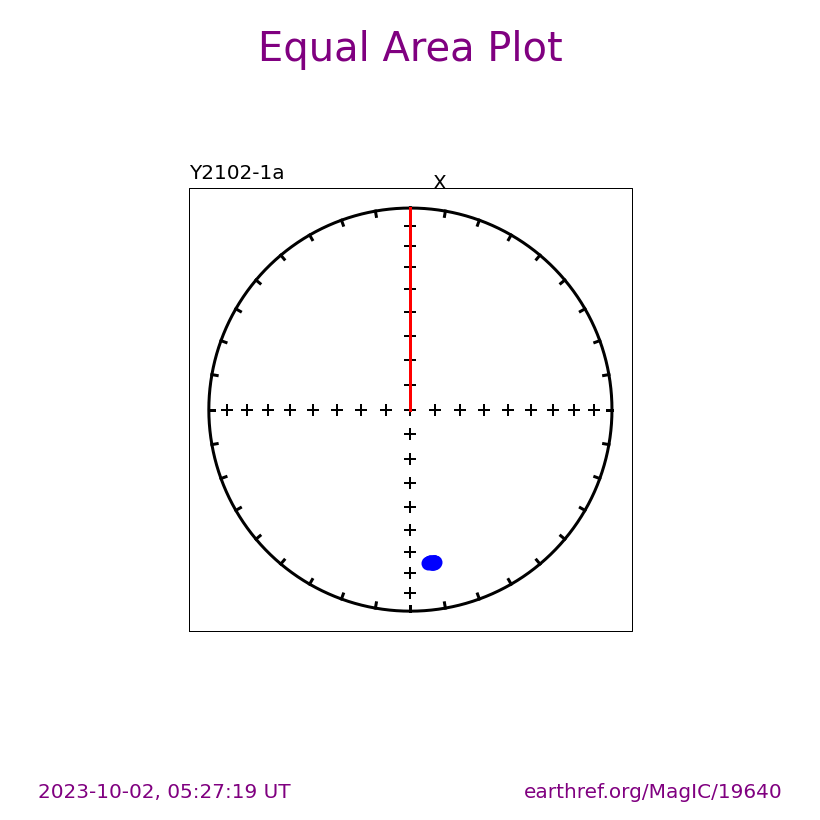

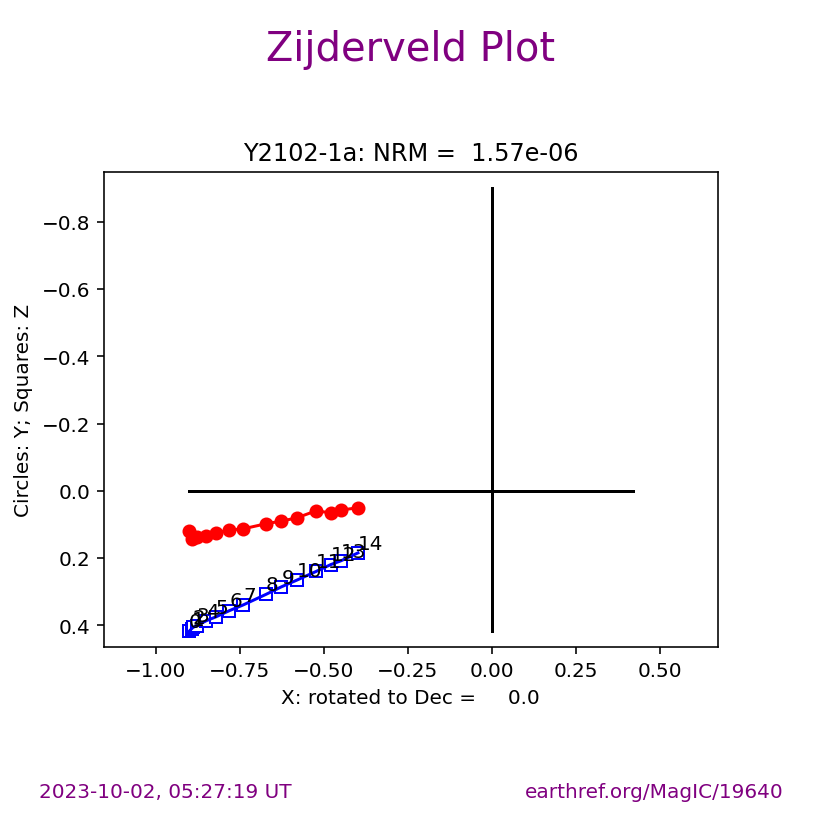

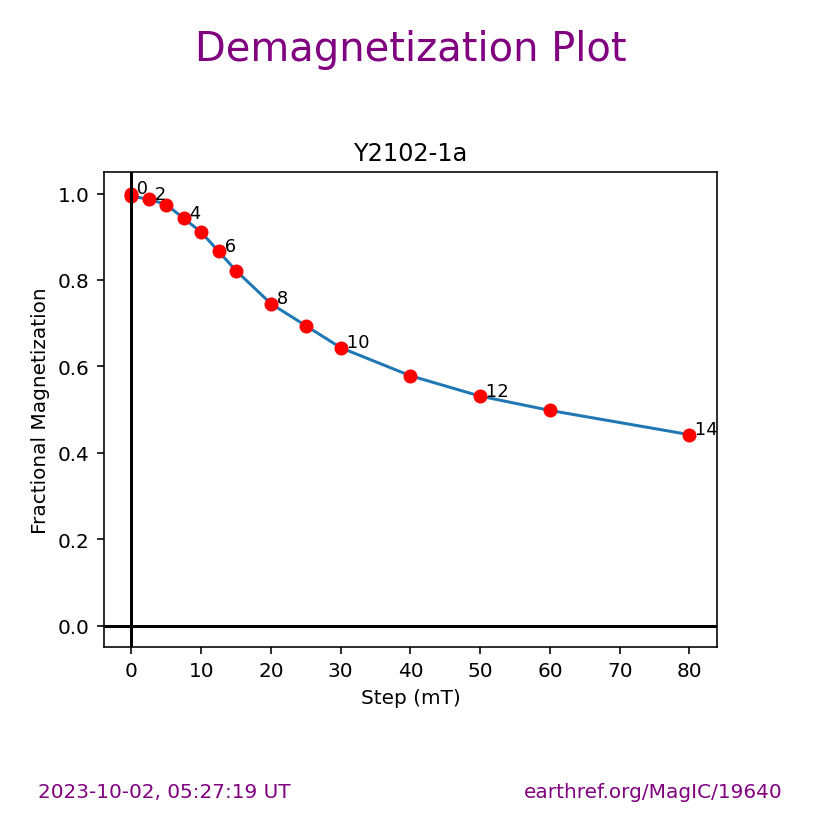

In [5]:
ipmag.zeq_magic(save_plots=False, 
                input_dir_path=directory, 
                n_plots=1)

## Get specimen list

We can get lists of MagIC_names for locations, sites, samples, specimens using `ipmag.list_MagIC_names`. Let's look at all of the specimen names.

In [6]:
MagIC_names = ipmag.list_MagIC_names(directory)
MagIC_names['specimens']

['Y2102-1a',
 'Y2102-2a',
 'Y2102-2b',
 'Y2102-3a',
 'Y2102-4a',
 'Y2102-5a',
 'Y2102-5b',
 'Y2102-6a',
 'Y2102-6b',
 'Y2102-7a',
 'Y2102-8a',
 'Y211-1a',
 'Y211-2a',
 'Y211-3a',
 'Y211-3b',
 'Y211-4a',
 'Y211-5a',
 'Y211-6a',
 'Y211-7a',
 'Y211-7b',
 'Y211-8a',
 'Y211-9a',
 'Y213-10a',
 'Y213-11a',
 'Y213-1a',
 'Y213-1b',
 'Y213-2a',
 'Y213-3a',
 'Y213-4a',
 'Y213-5a',
 'Y213-6a',
 'Y213-6b',
 'Y213-7a',
 'Y213-7b',
 'Y213-8a',
 'Y213-8b',
 'Y213-9a',
 'Y214-10a',
 'Y214-10b',
 'Y214-11a',
 'Y214-11b',
 'Y214-12a',
 'Y214-1a',
 'Y214-2a',
 'Y214-3a',
 'Y214-4a',
 'Y214-4b',
 'Y214-5a',
 'Y214-5b',
 'Y214-6a',
 'Y214-7a',
 'Y214-8a',
 'Y214-9a',
 'Y215-10a',
 'Y215-10b',
 'Y215-1a',
 'Y215-1b',
 'Y215-2a',
 'Y215-3a',
 'Y215-3b',
 'Y215-4a',
 'Y215-5a',
 'Y215-5b',
 'Y215-6a',
 'Y215-6b',
 'Y215-7a',
 'Y215-7b',
 'Y215-8a',
 'Y215-8b',
 'Y215-9a',
 'Y215-9b',
 'Y216-10a',
 'Y216-11a',
 'Y216-1a',
 'Y216-2a',
 'Y216-2b',
 'Y216-3a',
 'Y216-3b',
 'Y216-4a',
 'Y216-4b',
 'Y216-5a',
 'Y216

## Plot a specific specimen

We can then have `ipmag.zeq_magic` plot a specific specimen rather than defaulting to plotting the first one.

(True, [])

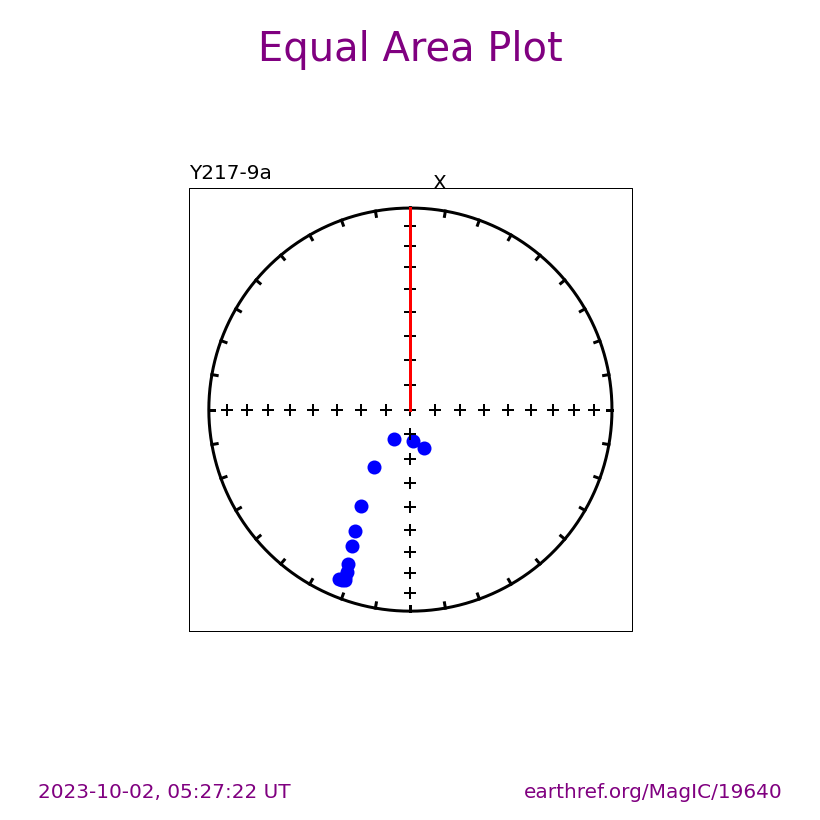

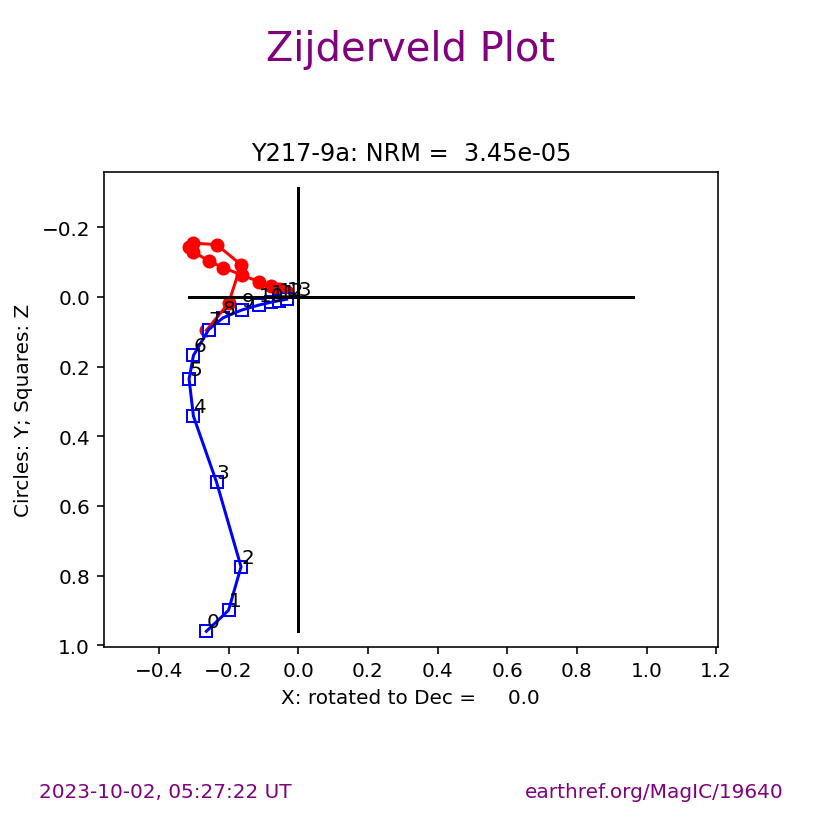

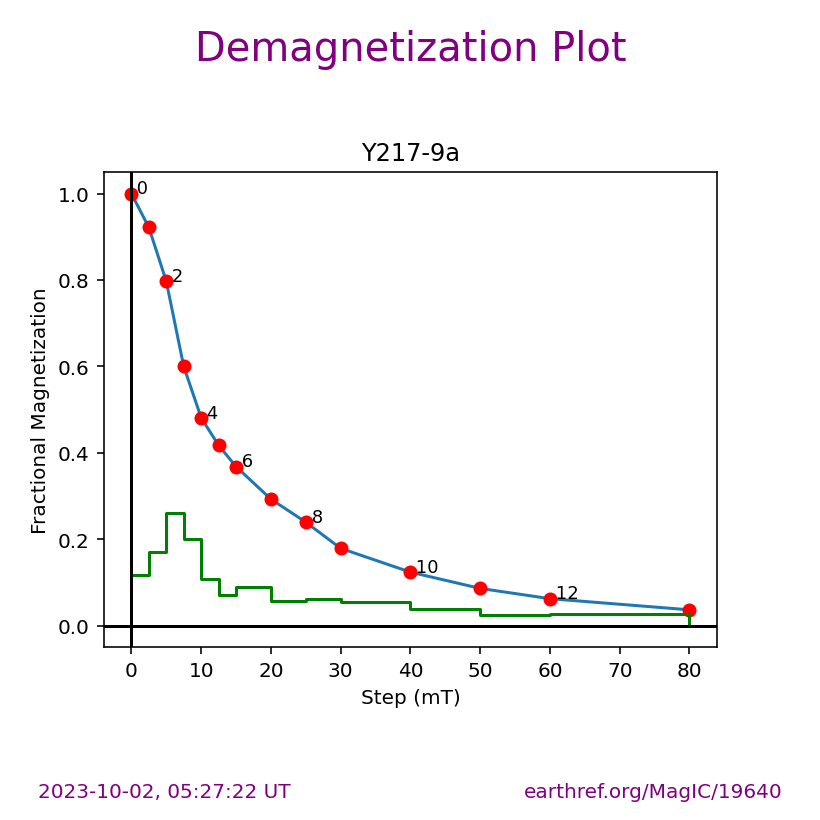

In [7]:
specimen_to_plot = 'Y217-9a'

ipmag.zeq_magic(save_plots=False, 
                input_dir_path=directory,
                specimen=specimen_to_plot)

(True, [])

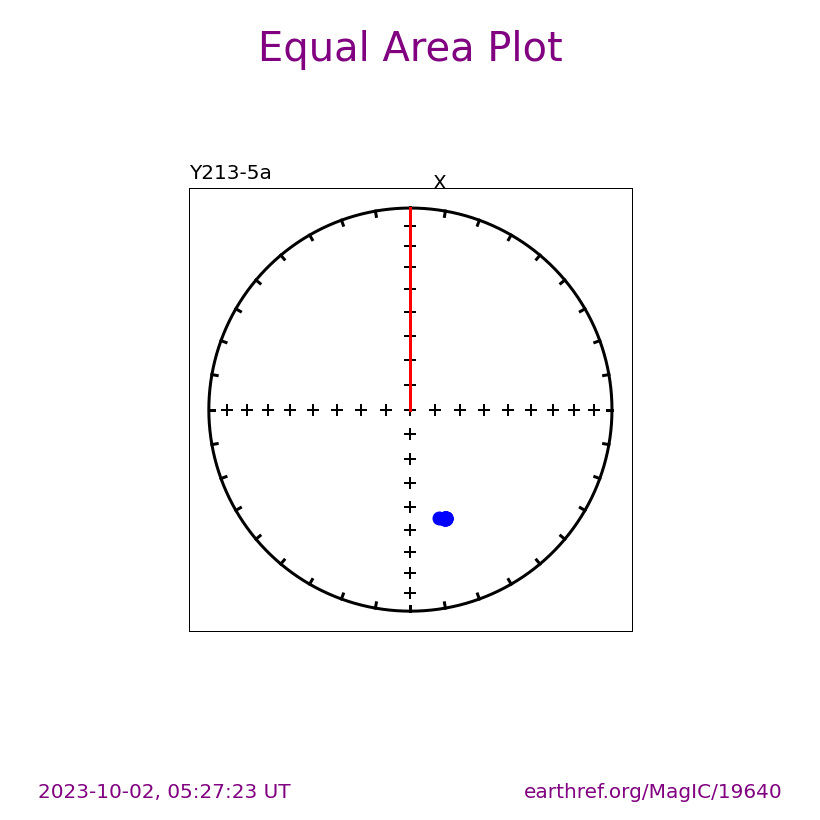

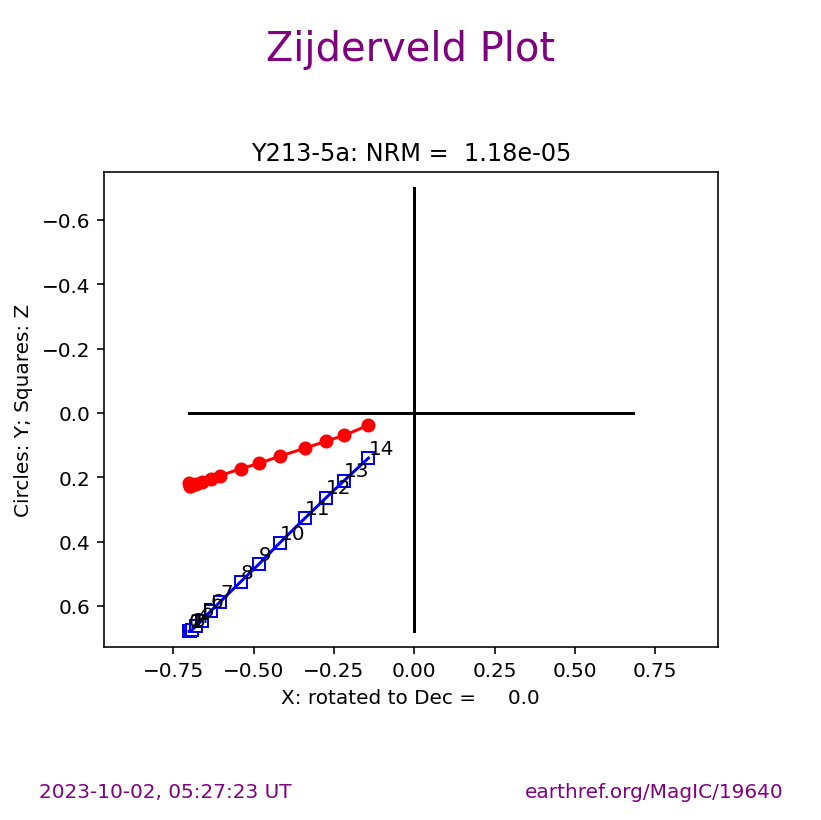

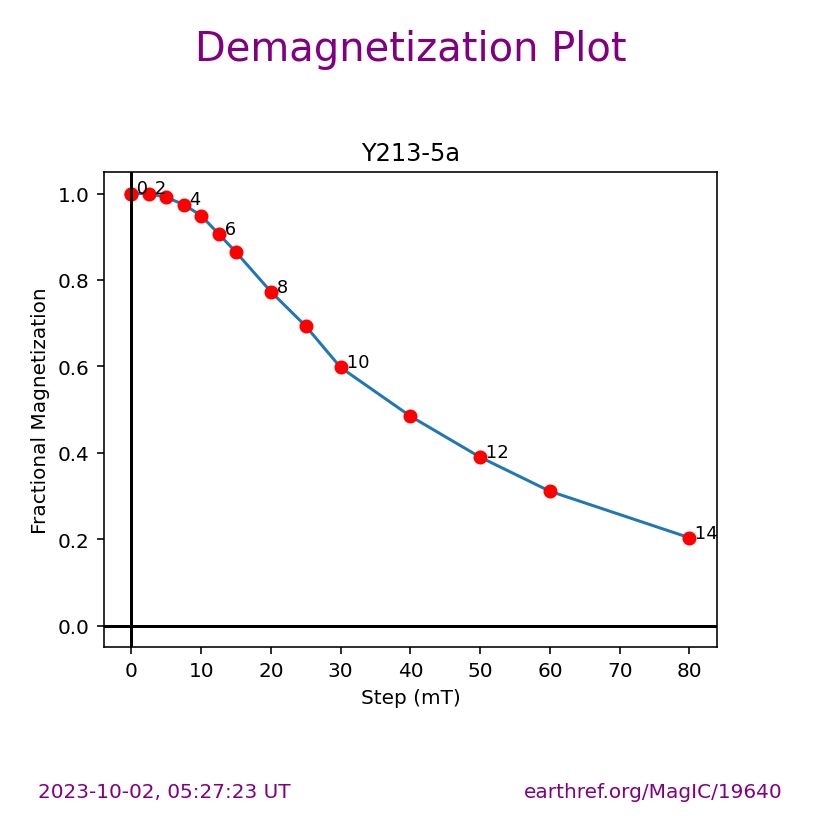

In [8]:
specimen_to_plot = 'Y213-5a'

ipmag.zeq_magic(save_plots=False, 
                input_dir_path=directory,
                specimen=specimen_to_plot)

## Visualizing site level data

Plots can also be saved by setting `save_plots` to be `True`

In [8]:
ipmag.eqarea_magic(save_plots=False, 
                   input_dir_path=directory,
                   dir_path=directory,
                   )

7  sites records read in
1  saved in  LO:_Mallard Lake_SI:__SA:__SP:__CO:_g_TY:_eqarea_.svg


(True, ['LO:_Mallard Lake_SI:__SA:__SP:__CO:_g_TY:_eqarea_.svg'])

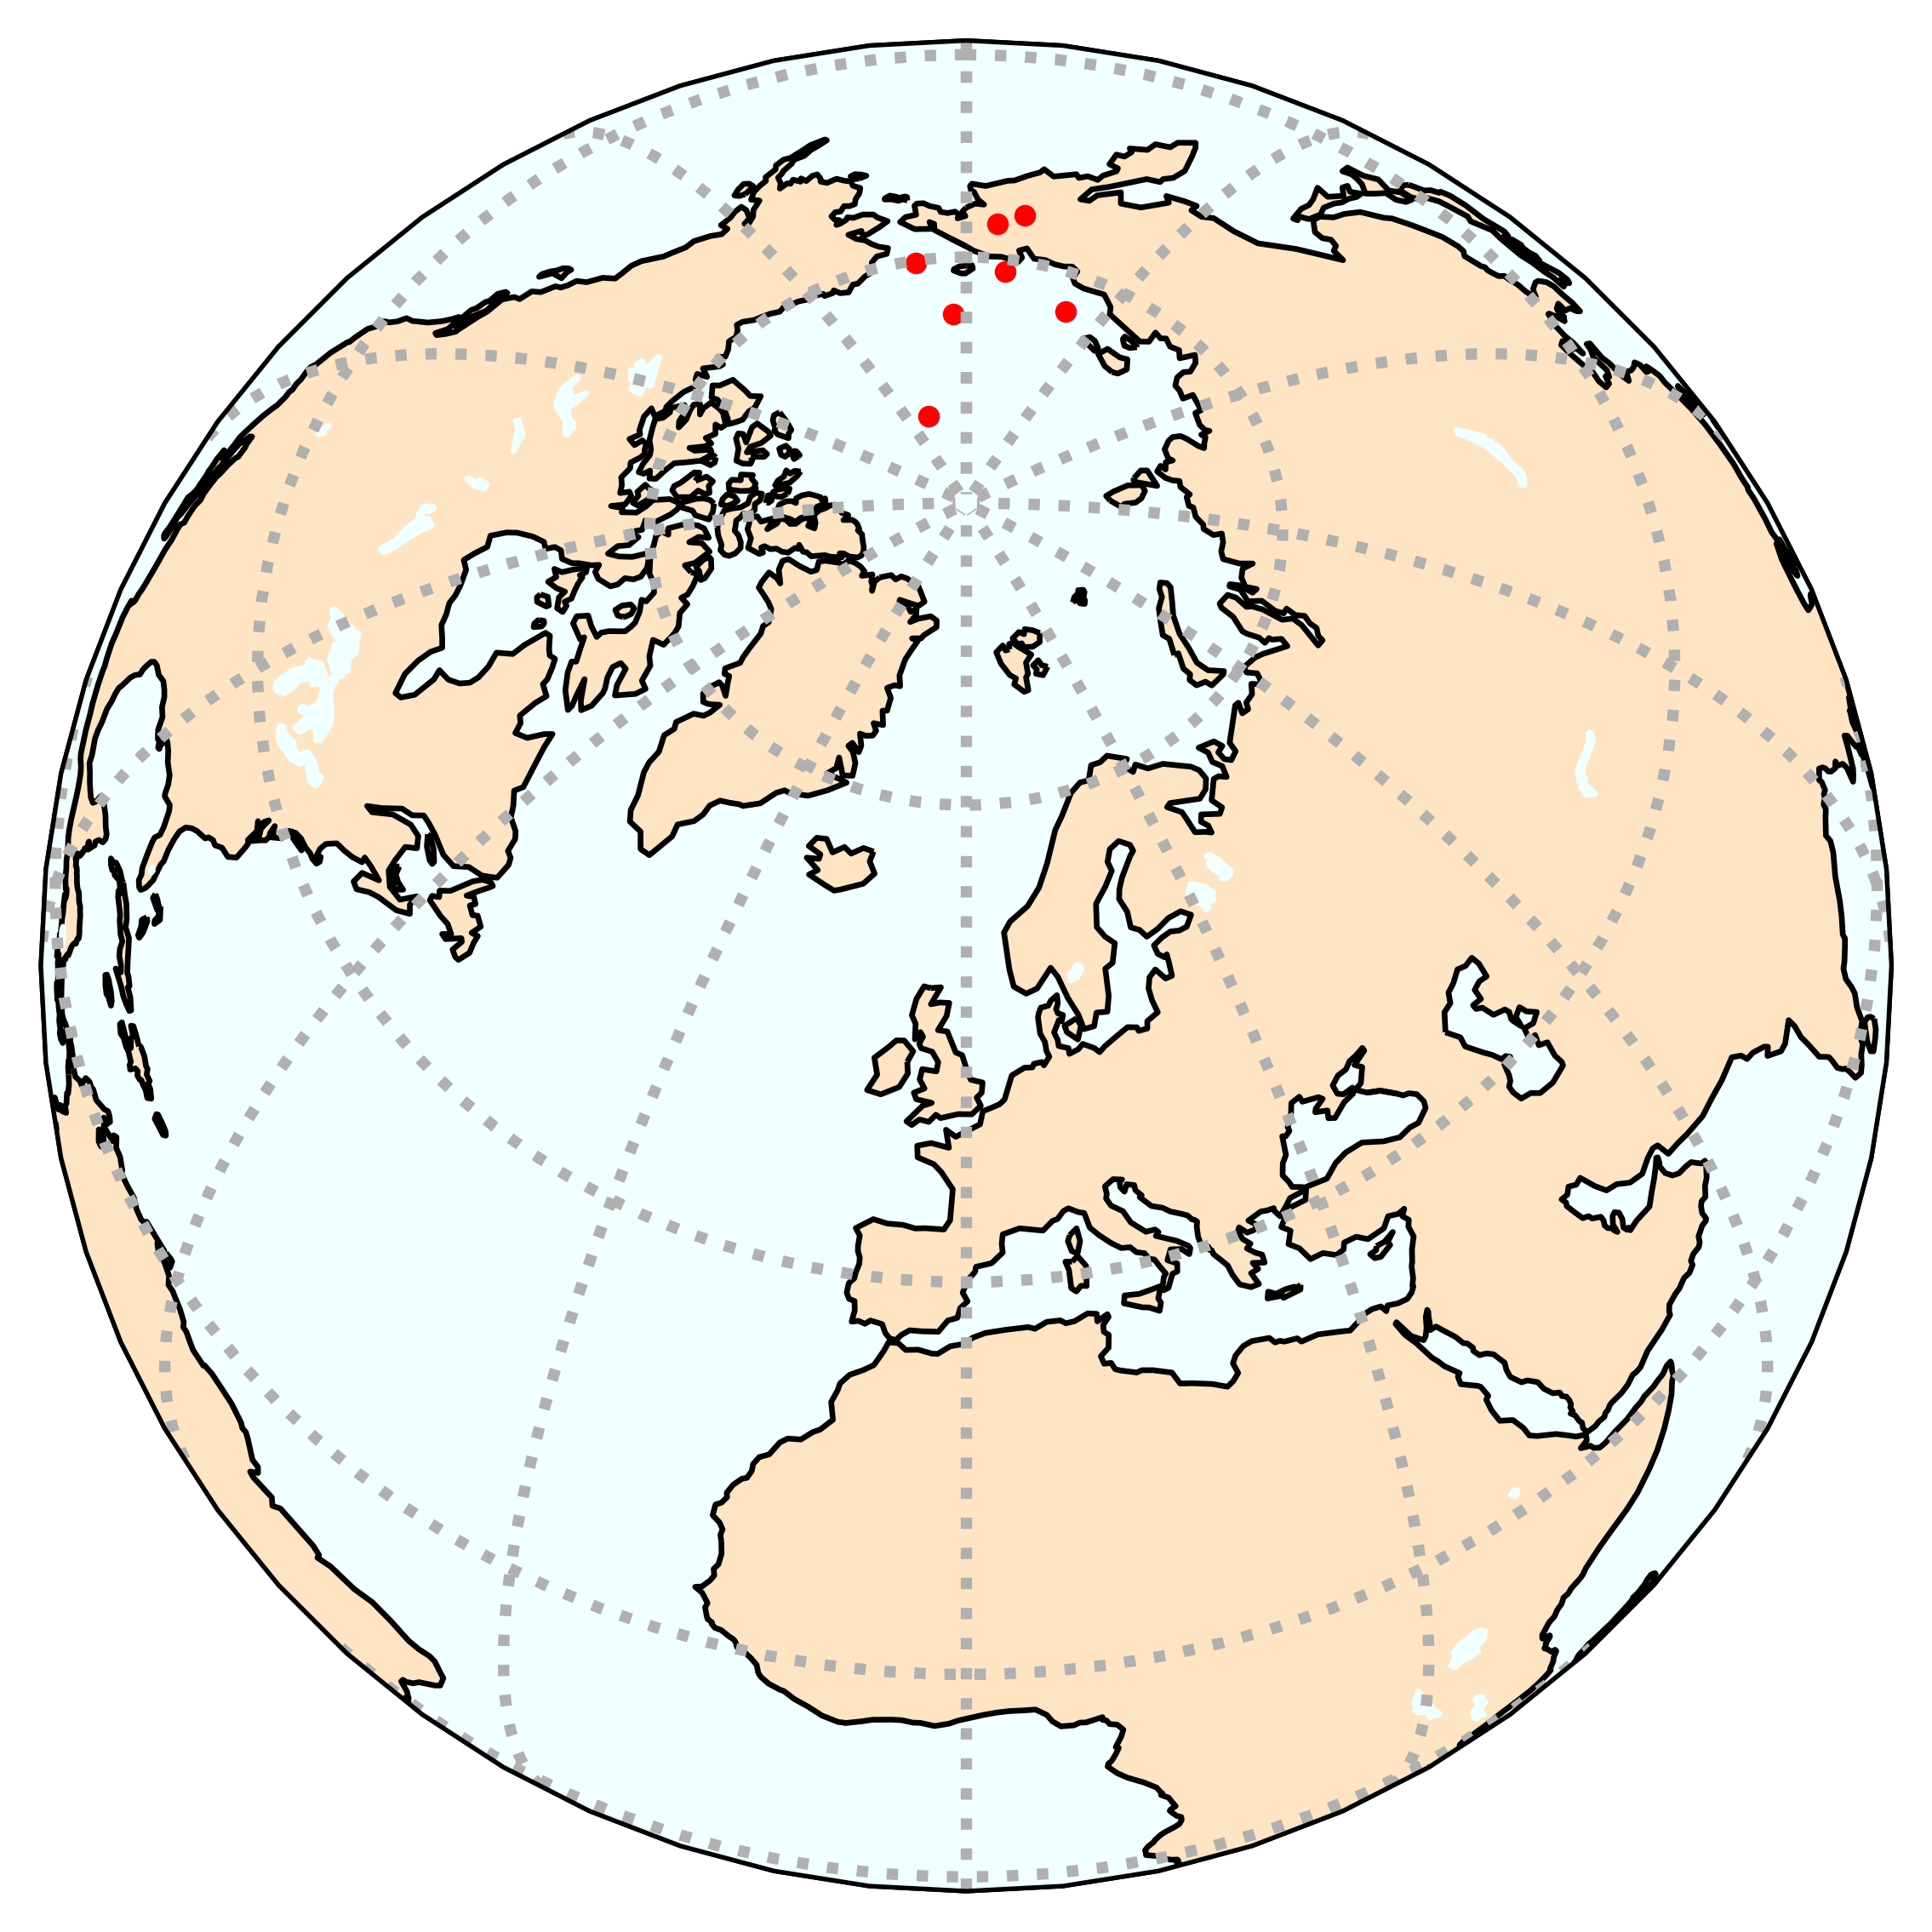

1  saved in  MC:_19640_TY:_VGP_map.pdf


(True, dict_values(['MC:_19640_TY:_VGP_map.pdf']))

In [9]:
ipmag.vgpmap_magic(dir_path=directory, flip=True,
                   save_plots=False,
                   lat_0=60)

## Importing specific MagIC tables

The functions above `ipmag.zeq_magic`, `ipmag.eqarea_magic`, and `ipmag.vgpmap_magic` are convenience functions that are able to directly read from MagIC files. For some other functions in `PmagPy` data need to be imported to be Python objects. There is a really nice package for dealing with tabular data in Python called `pandas`. The code cell below imports this package so that we can use it. We use the typical scientific Python nomenclature of importing it for use to the shorthand `pd`.

### Import the sites table

We can now use pandas to import the sites table to a pandas dataframe using the function `pd.read_csv()`.

In [10]:
sites = pd.read_csv(directory + 'sites.txt', sep='\t', header=1)
sites

,age,age_unit,analysts,citations,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,...,method_codes,result_quality,samples,site,software_packages,specimens,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,160.2,ka,AFP,This study,2.4,Y212_chrm,352.1,66.2,396,8,...,LP-DIR-AF:DE-BFL-A:DA-DIR-GEO:LP-DIR-T:DE-BFL:...,g,Y2102-1:Y2102-2:Y2102-3:Y2102-4:Y2102-5:Y2102-...,Y2102,pmagpy-4.2.108: demag_gui.v.3.0,Y2102-1a:Y2102-2a:Y2102-2b:Y2102-3a:Y2102-4a:Y...,3.9,3.2,83.1,199.7
1,159.9,ka,AFP,This study,7.7,Y211_chrm,339.3,66.2,54,6,...,LP-DIR-T:DE-BFP:DA-DIR-GEO:DE-BFL-A:LP-DIR-AF:...,g,Y211-1:Y211-2:Y211-3:Y211-4:Y211-5:Y211-7,Y211,pmagpy-4.2.108: demag_gui.v.3.0,Y211-1a:Y211-2a:Y211-3a:Y211-3b:Y211-4a:Y211-5...,12.6,10.3,75.2,183.1
2,160.2,ka,AFP,This study,4.9,Y213_chrm,332.1,68.1,87,1,...,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DIR-T:DE-BFL-A:...,g,Y213-10:Y213-1:Y213-2:Y213-3:Y213-4:Y213-5:Y21...,Y213,pmagpy-4.2.108: demag_gui.v.3.0,Y213-10a:Y213-1a:Y213-1b:Y213-2a:Y213-3a:Y213-...,8.2,6.9,70.2,189.3
3,161.7,ka,AFP,This study,4.7,Y214_chrm,337.5,60.9,88,1,...,LP-DIR-AF:DE-BFL:DA-DIR-GEO:DE-BFL-A:LP-DIR-T:...,g,Y214-11:Y214-1:Y214-2:Y214-3:Y214-4:Y214-5:Y21...,Y214,pmagpy-4.2.108: demag_gui.v.3.0,Y214-11a:Y214-1a:Y214-2a:Y214-3a:Y214-4a:Y214-...,7.2,5.5,73.5,157.8
4,160.8,ka,AFP,This study,3.0,Y215_chrm,333.3,64.1,211,1,...,LP-DIR-AF:DE-BFL:DA-DIR-GEO:DE-BFL-A:LP-DIR-T:...,g,Y215-10:Y215-1:Y215-2:Y215-3:Y215-4:Y215-5:Y21...,Y215,pmagpy-4.2.108: demag_gui.v.3.0,Y215-10a:Y215-1b:Y215-2a:Y215-3b:Y215-4a:Y215-...,4.8,3.8,71.2,172.5
5,160.8,ka,AFP,This study,1.9,Y216_chrm,326.3,64.7,549,1,...,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DIR-AF:DE-BFL-A:...,g,Y216-10:Y216-11:Y216-1:Y216-2:Y216-3:Y216-4:Y2...,Y216,pmagpy-4.2.108: demag_gui.v.3.0,Y216-10a:Y216-11a:Y216-1a:Y216-2a:Y216-3a:Y216...,3.1,2.5,65.4,171.3
6,160.8,ka,AFP,This study,3.4,Y217_chrm,326.5,64.4,185,1,...,LP-DIR-AF:DE-BFL:DA-DIR-GEO:DE-BFL-A:LP-DIR-T:...,g,Y217-10:Y217-1:Y217-2:Y217-3:Y217-4:Y217-5:Y21...,Y217,pmagpy-4.2.108: demag_gui.v.3.0,Y217-10a:Y217-1a:Y217-2a:Y217-2b:Y217-3a:Y217-...,5.4,4.4,66.6,175.1


### Plot the sites and calculate the Fisher mean

We can extract specific columns from the dataframe by using the nomenclature `dataframe_name['column_name']`. In this case, the dataframe name is `sites` and the column name might be `dir_dec`. So `sites['dir_dec']` will give us  all the declinations.

In [11]:
sites_dec = sites['dir_dec']
sites_inc = sites['dir_inc']

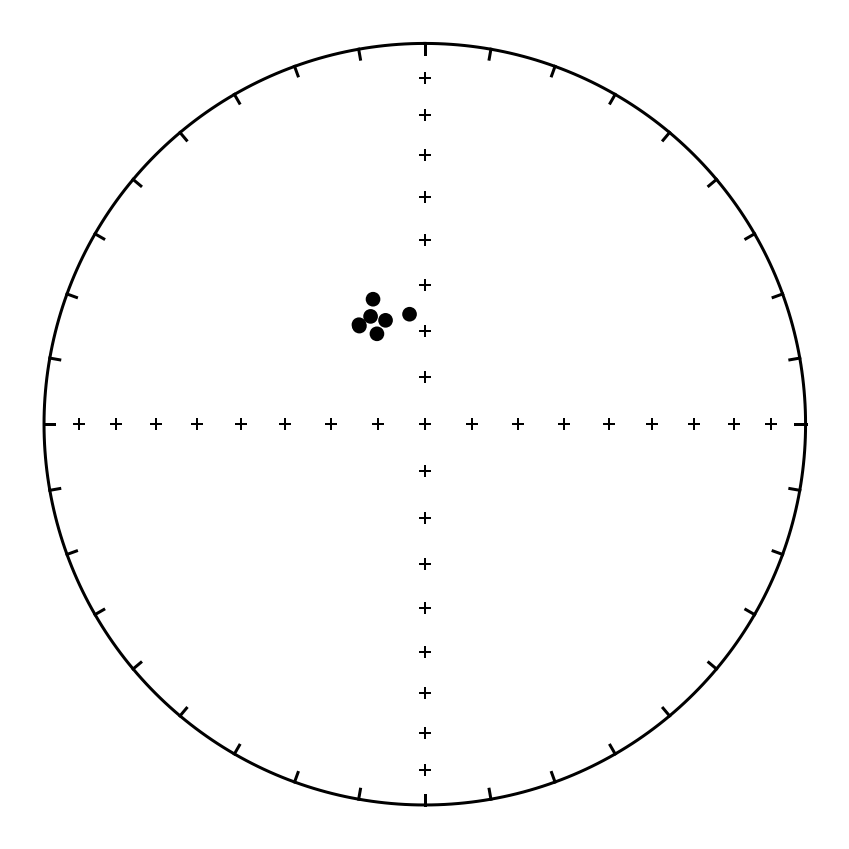

In [12]:
plt.figure(figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(sites_dec, sites_inc, color='black', marker='o', markersize=40)

In [13]:
mean_direction = ipmag.fisher_mean(sites_dec, sites_inc)
ipmag.print_direction_mean(mean_direction)

Dec: 335.2  Inc: 65.2
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 3.2
Precision parameter (k) estimate: 348.8


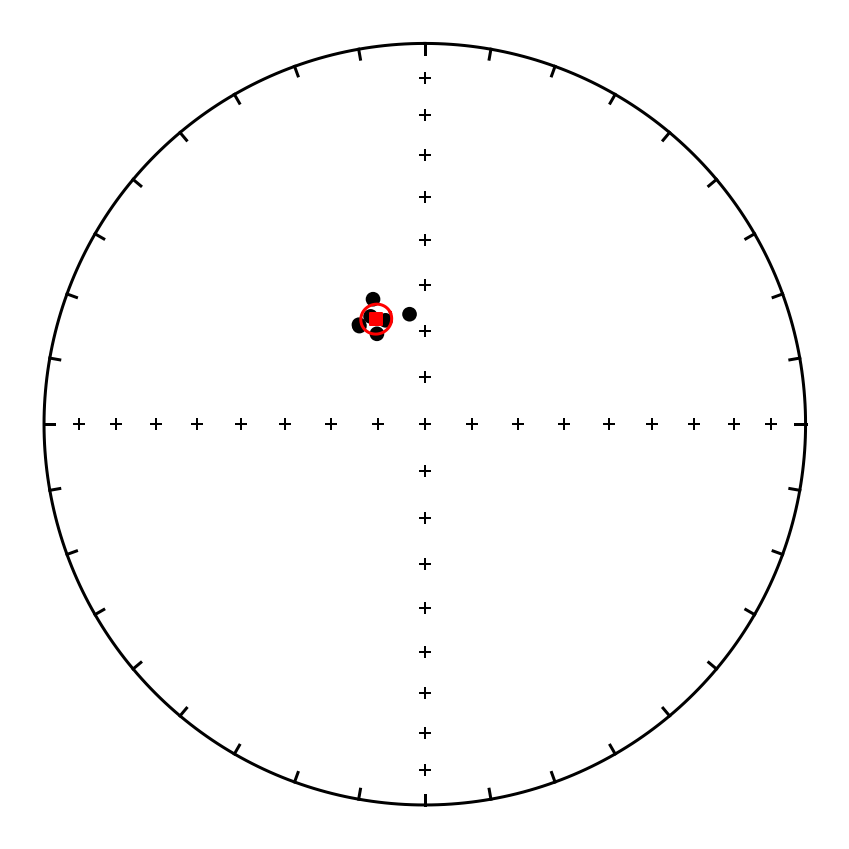

In [14]:
plt.figure(figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(sites_dec, sites_inc, color='black', marker='o', markersize=40)
ipmag.plot_di_mean(mean_direction['dec'], mean_direction['inc'], mean_direction['alpha95'],
                   color='red', marker='s', markersize=40)